# Facial Recognition

In class, we learned how to use the Triplet Margin Loss to train an embedding on faces. Unfortunately, actually training such a system of that size would take more time and money than we can budget for.  Fortunately, we can use facial encoders created by others.

## Setup

- Download [this tarball](mids.tgz) which is full of your official portraits to `/SI470/<your_folder>`.  This will serve as our gallery images.
- Wherever you're going to do your coding, run `git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch`.
- Be sure you're in a virtual environment that has pytorch, matplotlib, and Pillow.

## Demo of Pillow and facenet_pytorch

We can use matplotlib and pillow to read in and show images:

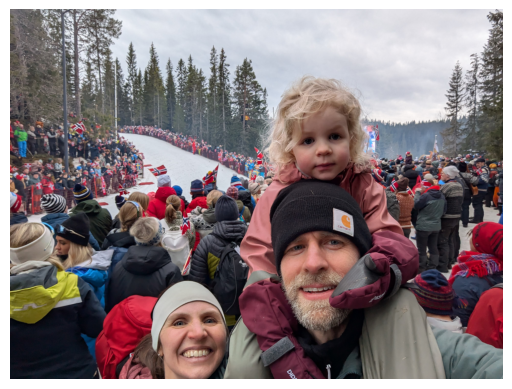

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

example = Image.open('ski_race.jpg')
example.load()

plt.imshow(example)
plt.axis('off')
plt.show()

We can identify and crop faces using a pretrained network from `facenet_pytorch`:

In [6]:
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=True).eval() # To only get back 1 face, remove "keep_all=True"
print(mtcnn)

cropped = mtcnn(example)
print('\n----\n\n')
print(f'output is of size {cropped.size()}')

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

This output indicates that it has found 11 faces, and each cropped image is 3x160x160. Let's look at some of them.

Pytorch puts the RGB channels first, and matplotlib expects them last, so to show them, we have to permute the dimensions. Also, the channels are now meant to be centered around 0, while matplotlib expects them to be between 0 and 1. This makes the display a bit screwy. We could fix it, but we can see what's going on without it.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.85546875].


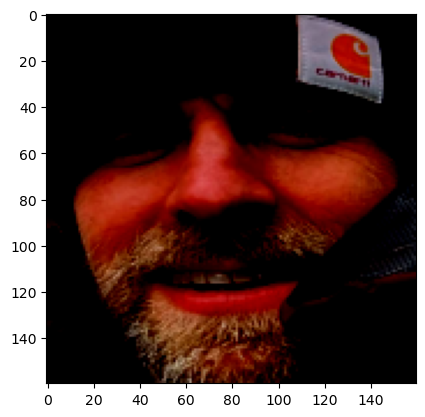

In [7]:
plt.imshow(cropped[0].permute(1,2,0))

That's me! Let's look at a couple more faces it found.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.89453125].


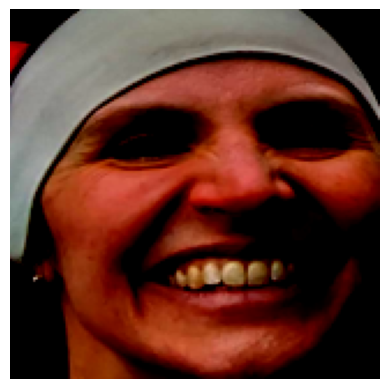

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.79296875].


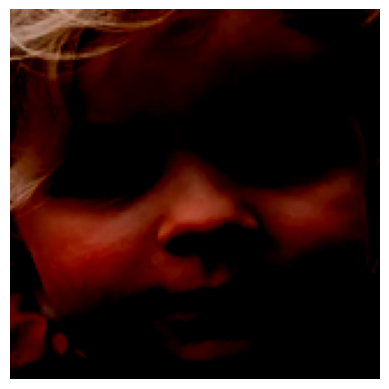

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.63671875].


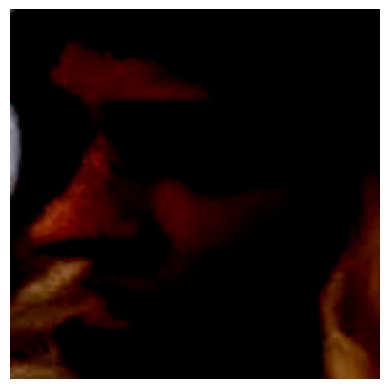

In [9]:
plt.imshow(cropped[1].permute(1,2,0))
plt.axis('off')
plt.show()

plt.imshow(cropped[2].permute(1,2,0))
plt.axis('off')
plt.show()

plt.imshow(cropped[3].permute(1,2,0))
plt.axis('off')
plt.show()

It's my family! And some other person! (the girl in the blue coat on the left of the image?)

If you just want one face back, you can remove the `keep_all=True` from the initializer of the network.

## Embeddings

Once you have a cropped face, you can calculate embeddings.  It expects a `n x 3 x 160 x 160` tensor, like the ones output by the cropper. If you have the cropper only output a single face by removing `keep_all=True`, you'll get back a `3 x 160 x 160` - you can make this the right size with `unsqueeze()`.

Here's an example of calculating embeddings of these 11 faces.

In [13]:
from facenet_pytorch import InceptionResnetV1
import torch

resnet = InceptionResnetV1(pretrained='vggface2').eval()
with torch.no_grad():
    embedding = resnet(cropped)
print(embedding.shape)

torch.Size([11, 512])


As you can see, this outputs an embedding in 512-dimensional space for all 11 faces detected.

## Your Task

Build a facial recognition system. To do this, you'll need to take some pictures on your phone. Calculate embeddings of all the people in your gallery of formal portraits, and for a variety of probe images taken "in the wild," calculate the five individuals with embeddings most similar to those in the probe images.


To help you, make a function which displays the probe image and the five gallery images of your matches.

Use some challenging pictures. People in a hat, or a Halloween costume, or covid mask, or facial hair, or bad lighting, etc. How well do they work?

Create three galleries:
- Just our class
- All 1/C midshipmen
- All midshipmen

Compare accuracy of your images in those three sets.